# (ford gobike system data )
## by (Hanan alradadi)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
df.columns.values

array(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'], dtype=object)

In [7]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df['start_time']= pd.to_datetime(df['start_time'])
df['start_day_of_week']=df['start_time'].dt.strftime('%a')
df['start_hour_of_day']=df['start_time'].dt.hour
df['end_time']= pd.to_datetime(df['end_time'])
df['end_month']=df['end_time'].dt.strftime('%B')
df['end_day_of_week']=df['end_time'].dt.strftime('%a')
df['end_hour_of_day']=df['end_time'].dt.hour

In [10]:
df['period_day'] = 'morning'
df['period_day'][(df['start_hour_of_day'] >= 12) & (df['start_hour_of_day'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour_of_day'] >= 18) & (df['start_hour_of_day'] <= 23)] = 'night'

<ipython-input-10-52422b316686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour_of_day'] >= 12) & (df['start_hour_of_day'] <= 17)] = 'afternoon'
<ipython-input-10-52422b316686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour_of_day'] >= 18) & (df['start_hour_of_day'] <= 23)] = 'night'


### What is the structure of your dataset?

> This dataset has 16 columns ['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'] and 183412  Rows

### What is/are the main feature(s) of interest in your dataset?

> start_time and user_type and member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the trip , gender and user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Comparison between the user_type

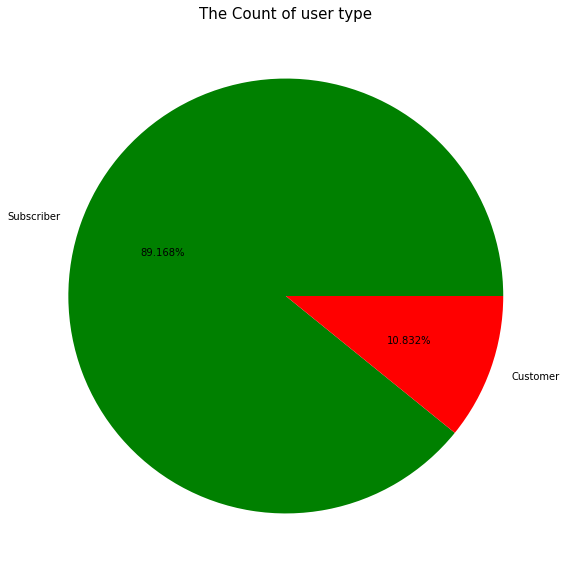

In [11]:
plt.figure(figsize=(10,10))
sorted_counts = df['user_type'].value_counts()
plt.pie(df['user_type'].value_counts(), labels = df['user_type'].value_counts().index , autopct='%1.3f%%',colors = 'green');
plt.title('The Count of user type', fontsize=15);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

Text(0.5, 1.0, 'Everyday use of the Ford GoBikes system in 2019')

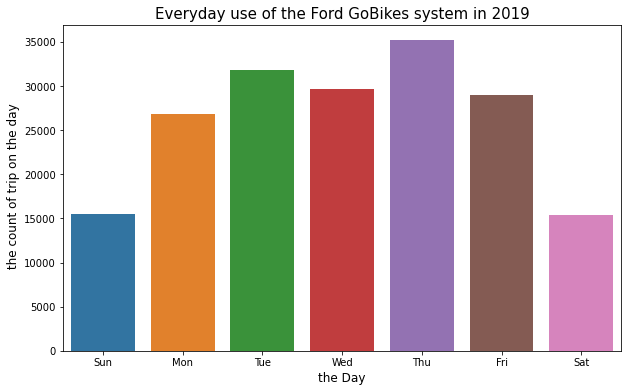

In [12]:
plt.figure(figsize=(10,6))

sb.countplot(data=df, x='start_day_of_week', order = [ 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']);
plt.ylabel(' the count of trip on the day' , fontsize = 12 )
plt.xlabel('the Day',fontsize = 12) 
plt.title('Everyday use of the Ford GoBikes system in 2019',fontsize = 15)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> no i dont nedd to perform any transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### The top 20 of starting point

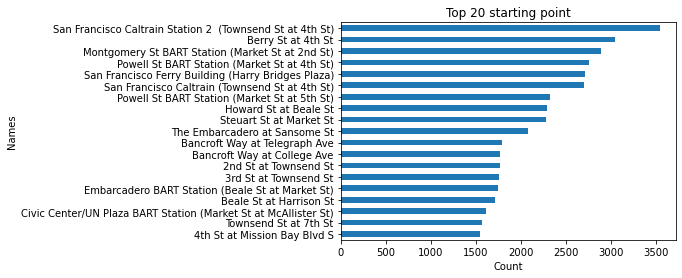

In [13]:
df.start_station_name.value_counts()[1:20].sort_values().plot(kind = 'barh')
plt.title('Top 20 starting point')
plt.xlabel('Count')
plt.ylabel('Names');

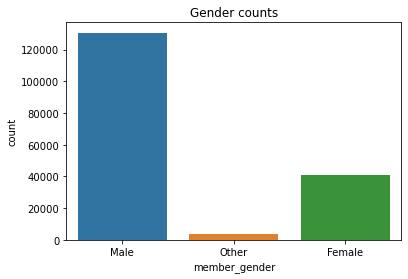

In [14]:
sb.countplot(data = df, x = 'member_gender', )
plt.title('Gender counts');

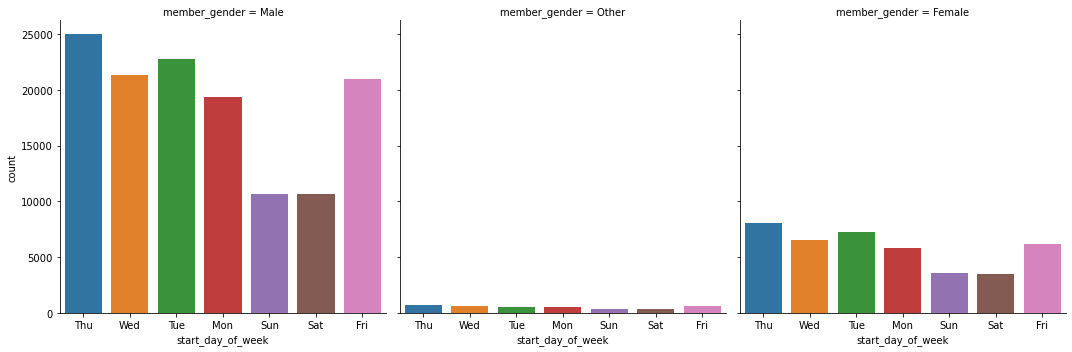

In [15]:
sb.catplot(data=df, x='start_day_of_week', col="member_gender", kind='count', sharey = True);

Text(0.5, 1.05, 'Customers vs Subscribers')

<Figure size 864x360 with 0 Axes>

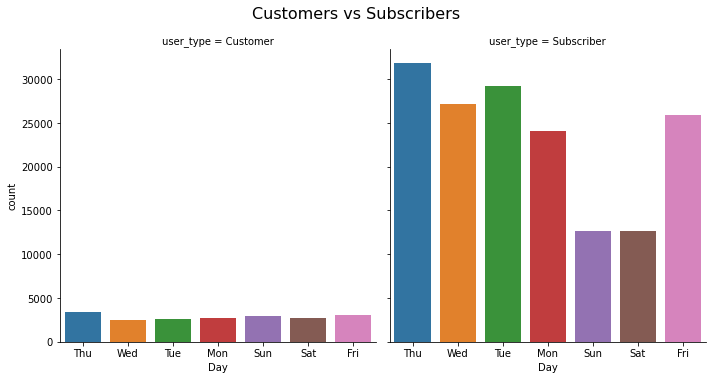

In [16]:
plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df, x='start_day_of_week', 
                   col="user_type", kind='count')
graph.set_axis_labels("Day")
graph.fig.suptitle('Customers vs Subscribers',
                   y=1.05, fontsize=16)


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most started day for customers ans subscriber for  all member_gender is the thuday

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> all the user type have the same order of days

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

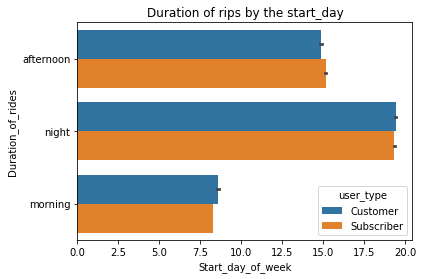

In [17]:

sb.barplot(data=df, x='start_hour_of_day', y='period_day', hue='user_type')
plt.xlabel('Start_day_of_week')
plt.ylabel('Duration_of_rides')
plt.title("Duration of rips by the start_day");

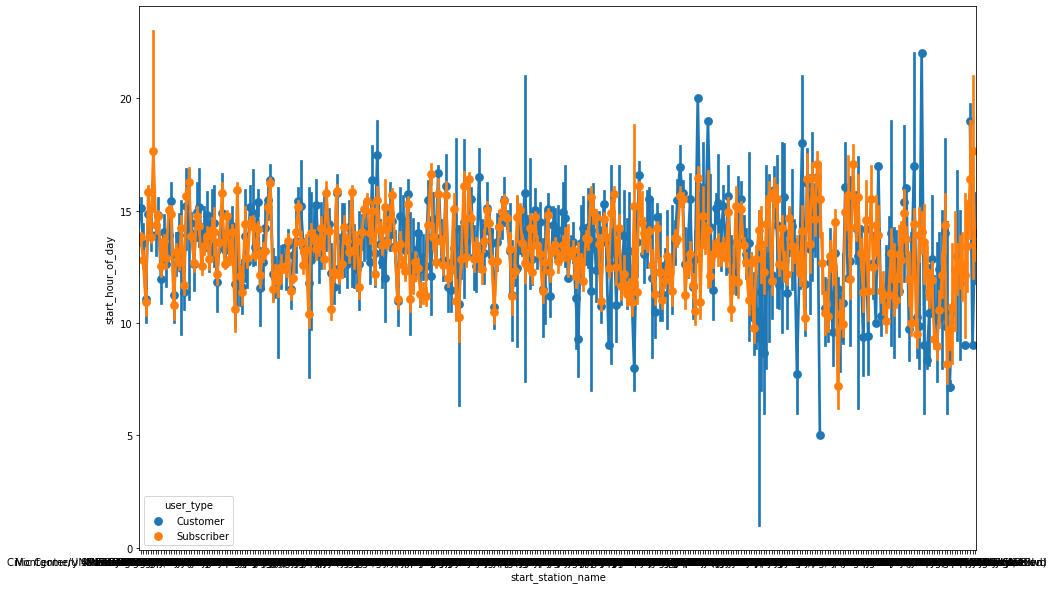

In [22]:
plt.figure(figsize=(15,10))
sb.pointplot(data= df, x='start_station_name', y='start_hour_of_day', hue='user_type');

In [19]:

df = df[df["member_birth_year"].isnull() == False]

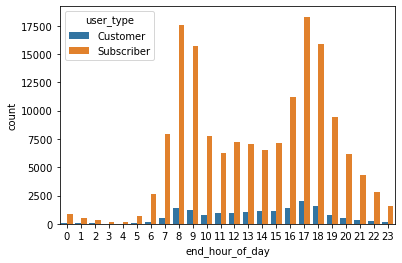

In [20]:

sb.countplot(data = df, x = 'end_hour_of_day', hue = 'user_type');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the most of user start in the nigeh

### Were there any interesting or surprising interactions between features?

> yes in the user type despite the large difference in number, there were similarities in some options

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!